**NOTE: Before running this notebook, place a copy of your downloaded RomeoAndJuliet.txt file in the same folder with this notebook.**

# 12.3 Visualizing Word Frequencies with Bar Charts and Word Clouds
* Can enhance your corpus analyses
    * A **bar chart** **quantitatively** visualizes the top 20 words in Romeo and Juliet as bars representing each word and its frequency.
    * A **word cloud** **qualitatively** visualizes more frequently occurring words in larger fonts and less frequently occurring words in smaller fonts.

## 12.3.1 Visualizing Word Frequencies with Pandas
* Visualize **Romeo and Juliet**’s top 20 words that are **not stop words**, using features from **TextBlob**, **NLTK** and **pandas**. 
* Pandas visualization capabilities are based on Matplotlib, so launch IPython with the following command for this session:
>```
ipython --matplotlib
```

* Or enable matplotlib in Jupyter

In [1]:
%matplotlib inline

### Loading the Data

In [2]:
from pathlib import Path

In [3]:
from textblob import TextBlob

In [4]:
blob = TextBlob(Path('RomeoAndJuliet.txt').read_text())

* Load NLTK stop words

In [5]:
from nltk.corpus import stopwords

In [6]:
stop_words = stopwords.words('english')

### Getting the Word Frequencies
* Get word frequency tuples

In [7]:
items = blob.word_counts.items()

### Eliminating the Stop Words
* The expression `item[0]` gets the word from each tuple so we can check whether it’s in `stop_words`

In [8]:
items = [item for item in items if item[0] not in stop_words]

### Sorting the Words by Frequency
* Sort the tuples in items in descending order by frequency
* To specify the tuple element to sort by, use the `itemgetter` function from the Python Standard Library’s `operator` module

In [9]:
from operator import itemgetter

In [10]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

### Getting the Top 20 Words
* `TextBlob` tokenizaton splits all **contractions** at their **apostrophes** and **counts** the total number of **apostrophes** as one of the “words” 
* **Romeo and Juliet** has many contractions
    * If you display `sorted_items[0]`, you’ll see that they are the most frequently occurring “word” with `867` of them
    * (In some **locales** this does not happen and element 0 is indeed `'romeo'`) 
    * We ignore element `0` 

In [11]:
top20 = sorted_items[1:21]

### Convert top20 to a DataFrame 

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(top20, columns=['word', 'count'])  

In [14]:
df

,word,count
0,romeo,315
1,thou,278
2,juliet,190
3,thy,170
4,capulet,163
5,nurse,149
6,love,148
7,thee,138
8,lady,117
9,shall,110


### Visualizing the DataFrame 
* **`bar` method** of the `DataFrame`’s **`plot` property** creates and displays a **Matplotlib bar chart**

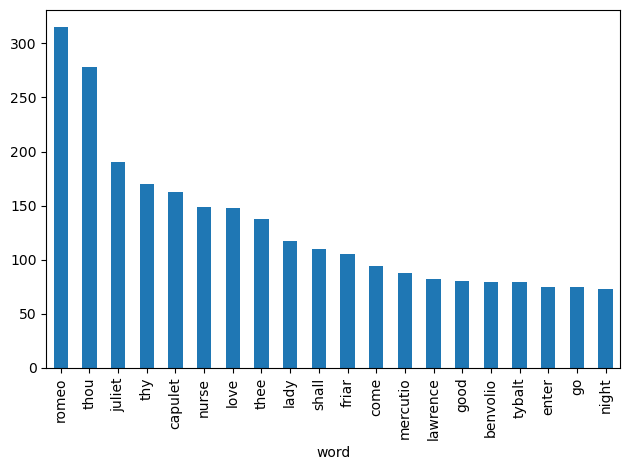

In [16]:
axes = df.plot.bar(x='word', y='count', legend=False)

import matplotlib.pyplot as plt

plt.gcf().tight_layout()